<a href="https://colab.research.google.com/github/luigiselmi/dl_tensorflow/blob/main/ml_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning fundamentals
One fundamental issue in machine learning is overfitting. One has to find the best trade-off between training a model, using the data available, that should also work well with unseen data. the trade-off is between optimization and generalization. The usual behavior while training a model is that the model improves, that is the validation error decreases, till a minimum after a certain number of epochs and after that the error starts to increase again. One source of overfitting is noisy training data, when in the training set there are examples that are outliers or that are mislabeled. We can see what happens when we add white noise images or black images to the MNIST dataset, a set of 60k 28x28 pixels images of digits from 0 to 9.

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), _ = mnist.load_data()
train_images.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

We reshape and normalize the MNIST data

In [3]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
train_images.shape

(60000, 784)

We create two new datasets by adding an equal number of white noise and black images to the MNIST dataset

In [4]:
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

We create a model of with single layer of 512 units and an output softmax layer to classify the images among 10 classes

In [5]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Now we use the model to create two instances using the noisy and the black datasets

In [6]:
model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 23ms/step - loss: 0.6247 - accuracy: 0.8129 - val_loss: 0.2748 - val_accuracy: 0.9195
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.2558 - accuracy: 0.9212 - val_loss: 0.2096 - val_accuracy: 0.9393
Epoch 3/10
375/375 [==============================] - 8s 21ms/step - loss: 0.1681 - accuracy: 0.9477 - val_loss: 0.1602 - val_accuracy: 0.9526
Epoch 4/10
375/375 [==============================] - 9s 23ms/step - loss: 0.1202 - accuracy: 0.9622 - val_loss: 0.1399 - val_accuracy: 0.9603
Epoch 5/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0885 - accuracy: 0.9719 - val_loss: 0.1541 - val_accuracy: 0.9558
Epoch 6/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0659 - accuracy: 0.9793 - val_loss: 0.1318 - val_accuracy: 0.9629
Epoch 7/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.1404 - val_accuracy: 0.9590

In [7]:
model = get_model()
history_zeros = model.fit(train_images_with_zeros_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 22ms/step - loss: 0.2960 - accuracy: 0.9136 - val_loss: 0.1426 - val_accuracy: 0.9588
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.1244 - accuracy: 0.9642 - val_loss: 0.1041 - val_accuracy: 0.9688
Epoch 3/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0814 - accuracy: 0.9752 - val_loss: 0.0916 - val_accuracy: 0.9707
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0590 - accuracy: 0.9825 - val_loss: 0.0794 - val_accuracy: 0.9768
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0435 - accuracy: 0.9872 - val_loss: 0.0982 - val_accuracy: 0.9701
Epoch 6/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0332 - accuracy: 0.9903 - val_loss: 0.0789 - val_accuracy: 0.9762
Epoch 7/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0244 - accuracy: 0.9933 - val_loss: 0.0734 - val_accuracy: 0.9786

We plot the validation accuracy for the two datasets. We can see that adding noise to the training data reduces the accuracy of the model. Noisy data lead to overfitting because the model learns non informative or misleading information. One way to reduce the problem is feature selection, that is removing outliers or ambiguous information from the training data. When the data is noisy the model will end up memorizing the training data and reducing its ability to generalize with unseen data. In this situation the model is overfitting.    

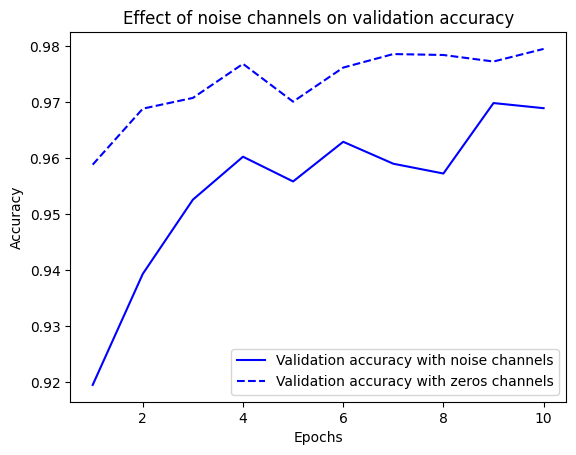

In [8]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-', label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--', label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## The manifold hypothesis
The hypothesis space from which we can sample the MNIST images, or in other words, the number of different such images that could be expected with each pixel represented in gray color with 8 bits, or $2^8 = 256$ values, and any value in that range of the 28x28=784 pixels independent from any other is ${2^8}^{784}$, or more simply $256^{784}$, a number bigger than the number of atoms in the universe. Since the real world is not completely random and there is always some correlation between neighboring pixels, the dimension of the hypothesis space is much smaller than that, and in the case of the problem at hand, the possible images representing digit numbers, is even smaller. The probability of a sample (or image in our case) can be computed by taking the derivative of the multidimensional hypothesis space in one point, we can think of it like a plane in a multidimensional space that is tangent to the hypothesis space. The derivative is called (differential) manifold, and the assumption is that in the real world that manifold can be represented by smooth functions.  

## Model's performance evaluation
A neural network model is a function that fits an unknown function that maps the input space to the output space. The quality of the fitting depends on the data points that have been used for the training: the more and closer they are in the sample space, the better is the fit between the model and the true but analytically unknown function. In order to assess the performance of a model we need to split our dataset into a training set and a test set so that we train the model with the training data set and we test its generalization performance on the test dataset. Since the evaluation is performed iteratively the most common way to train a model is to split the data into three subsets: a training data set, a validation dataset, to be used during the training iteration, and the test set. The test set should never be used more than once after the model has been trained and the validation error has been reduced to a minimum value. This technique is called **hold-out validation**. When the size of the dataset is small a better approach is to use [k-fold validation](regression.ipynb#K-fold validation)  